# Optimize paramters passed to gap_fit with gradient descent method, but just on one data set (training or test)

## Omptimizing RMSE 

In [4]:
# Importing everthing we need 
import sys
sys.path.append('../')

from GAP.gapmodels import GAPModel
from GAP.gapmodels import Split
from GAP.gapdescriptors import distance_2b
from GAP.gapplot import QualityPlot
import matplotlib.pyplot as plt
from textwrap import wrap

## fixed parameters 

In [5]:
cutoff = [4]
n_sparse = [15]
delta = [1]
sparse_method = ['UNIFORM']
covariance_type = ['ARD_SE']
sigma_fixed = ['0.0 0.0'] # sigma for hessian and virial stress is not used and hence won't be optimized

## variable parameters

In [6]:
theta = 1
sigma_energy = 1
sigma_force = 1




## Split up the Data 

In [8]:
## Import Hydrogen_MD Data and split into training and test data, use split 80%/20%
data='/Users/simon/simon_ml/tools/hydrogencrystal.xyz'
train_percentage = 0.8
split = Split(data, train_percentage)

#Perform the acutal split
train_file = 'train.xyz'
test_file = 'test.xyz'
split.split(train_file, test_file)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "forces" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "energies" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '


## Make function that is used for optimization. Function takes the 3 variable parameters as input and outputs and RMSE error

In [5]:
data_file = 'train.xyz'
def RMSE_train(tef):
    theta,sigma_energy,sigma_force = tef[0],tef[1],tef[2]
    data_file = 'train.xyz'
    # Initialize all parameters, fixed and variable
    cutoff = 4
    n_sparse = 15
    delta = 1
    sparse_method = 'UNIFORM'
    covariance_type = 'ARD_SE'
    sigma_fixed = '0.0 0.0' # sigma for hessian and virial stress is not used and hence won't be optimized
    theta = theta
    sigma_energy = sigma_energy
    sigma_force = sigma_force
    sigma = f"{sigma_energy} {sigma_force} {sigma_fixed}"
    descriptor_2b = distance_2b(cutoff=cutoff, covariance_type=covariance_type,delta=delta,theta_uniform=theta,
                                n_sparse=n_sparse, sparse_method=sparse_method,add_species='T')
    
    # Get parameter string
    parameters = descriptor_2b.get_parameter_string()
    
    # Make model
    model = GAPModel()

    # Select filename in which potential should be stored 
    potential=f"GAP.xml"

    # Train model
    model.train(parameters, training_data=data_file,GAP_potential=potential,sigma=sigma,print_output=False)

    # Select filename in which predictions should be stored for prediction data 
    prediction_file= f"quip_2b.xyz"

    # Predict energies on training data
    model.predict(Test_Data=data_file, GAP_potential=potential, QUIP_Prediction=prediction_file,print_output=False)
    
    # Calculate RMSE error
    RMSE = model.energy_RMSE(data_file,prediction_file)/192 + model.force_RMSE(data_file,prediction_file)/576
    

    # Make Plot 
    plot = QualityPlot()
    # Make subplots object, returning axis object which is going to be passed to QualityPlot
    figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})

    # Plot predicted energies of training data against real energies of training data
    plot.energies_on_energies(real_values=data_file, predicted_values=prediction_file, 
                            axis=axs[0],
                            title="\n".join(wrap(f"Energy of Training Data"
                            f"theta_uniform = {theta}, sigma_energy = {sigma_energy}",20)))
    
    plot.forces_on_forces(real_values=data_file, predicted_values=prediction_file, 
                        axis=axs[1],
                        title="\n".join(wrap(f"Force of Training Data"
                        f"theta_uniform = {theta}, sigma_force = {sigma_force}",20)))
    # Get real and predicted energies
    #real_energies, predicted_energies = model.getEnergies('train.xyz','quip_2b.xyz')
    
    return RMSE

## Use Steepest decent method to optimize the RMSE function for training data 

In [6]:
# Optimize RMSE of training data 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.05 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0333333333333332 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0499999999999998 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0555555555555554 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 4

<ipython-input-5-9f2a3508f888>:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})


 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.041467573540619 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.034896230249454 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.024207226201968 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0155770525326426 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0296510278187045 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0308856221810134 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0300625592728077 sparse_method = UNIFO

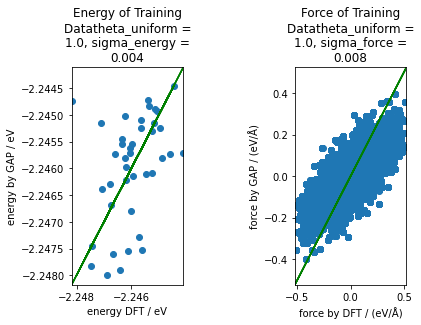

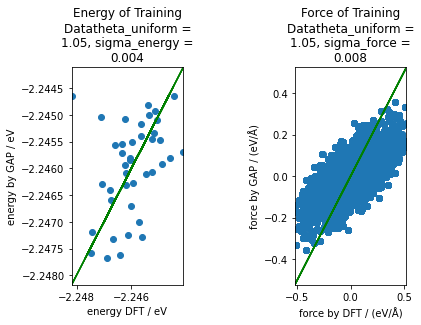

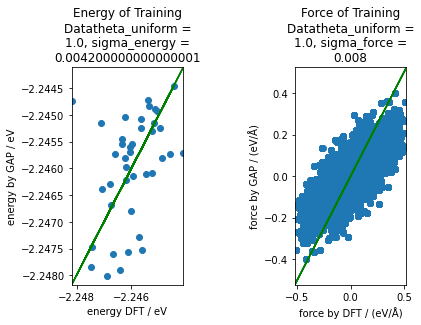

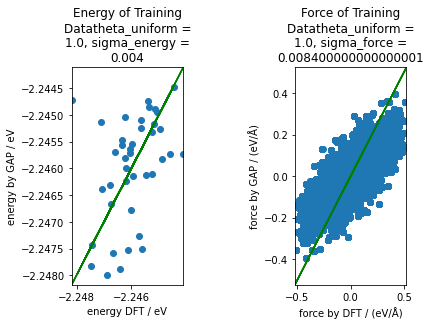

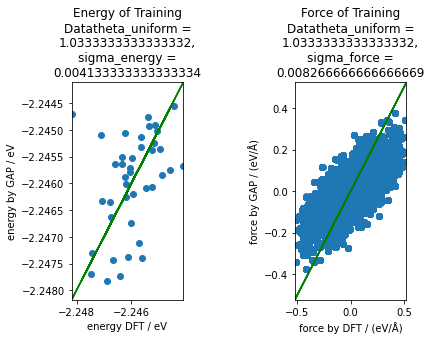

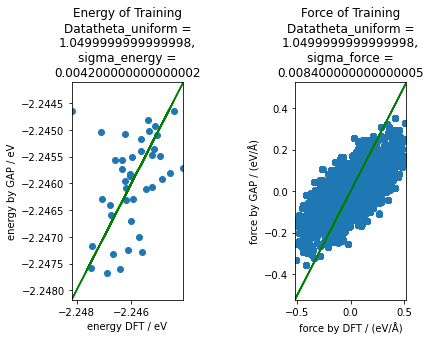

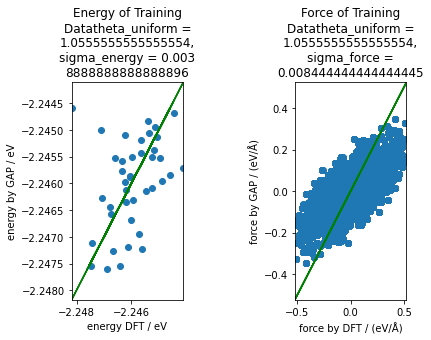

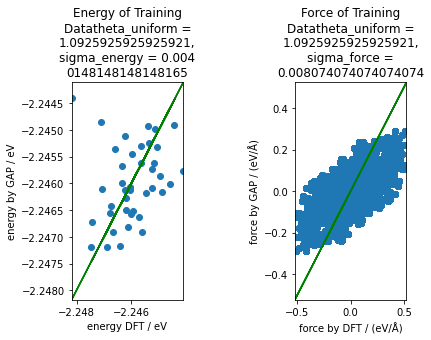

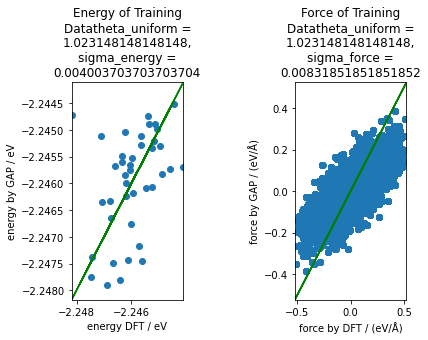

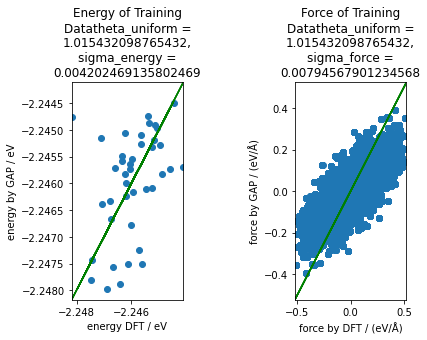

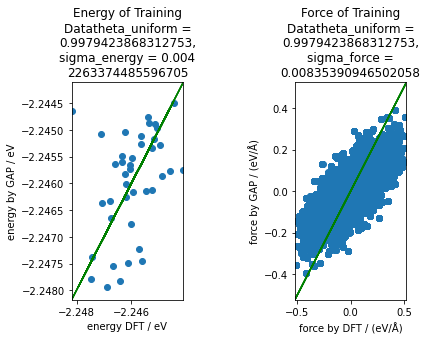

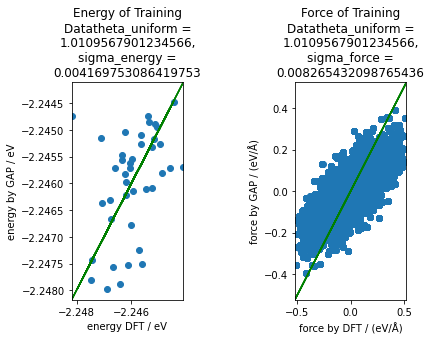

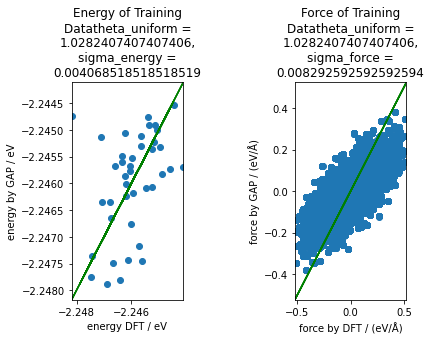

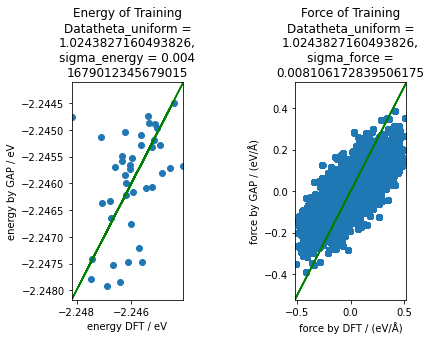

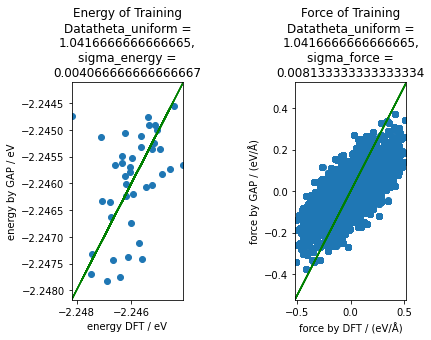

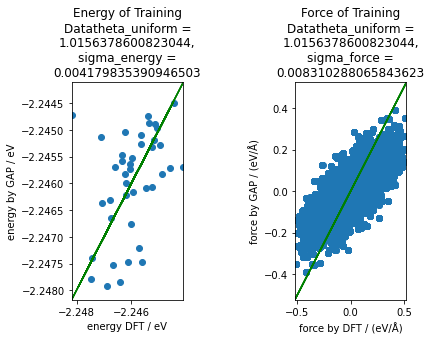

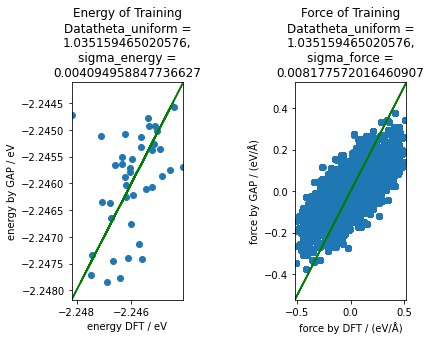

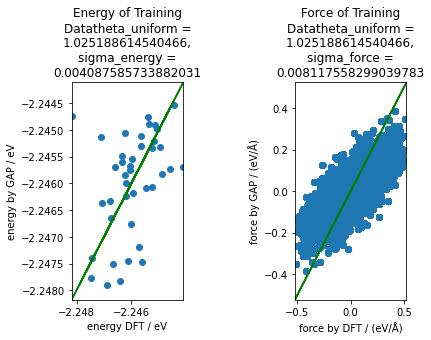

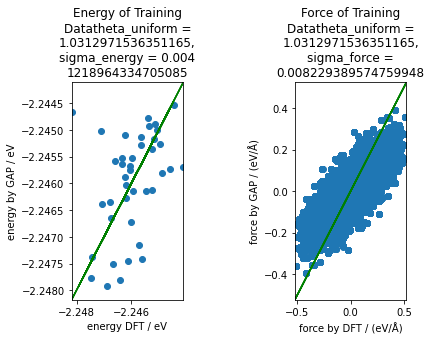

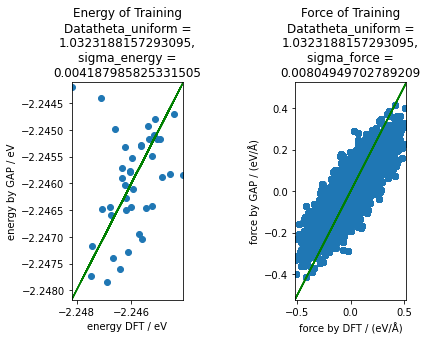

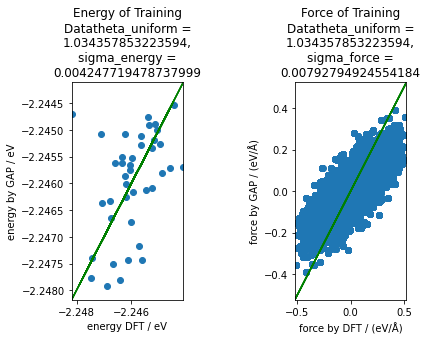

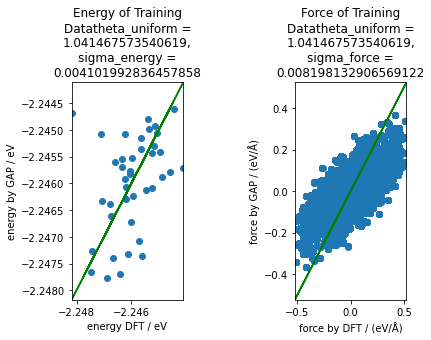

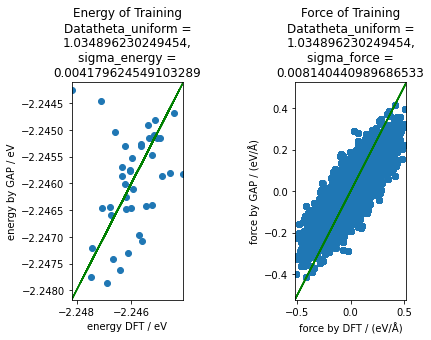

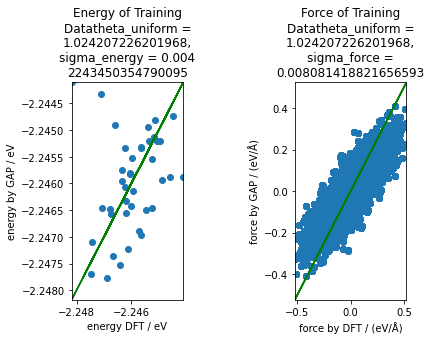

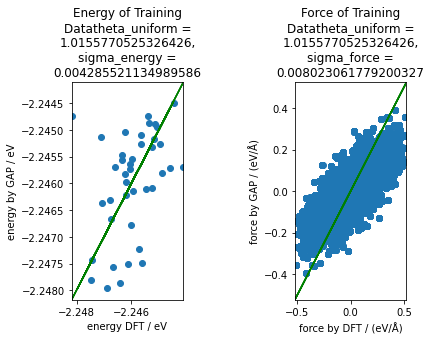

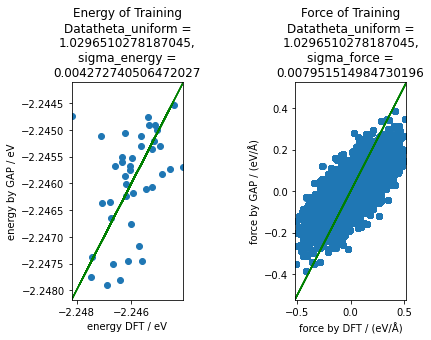

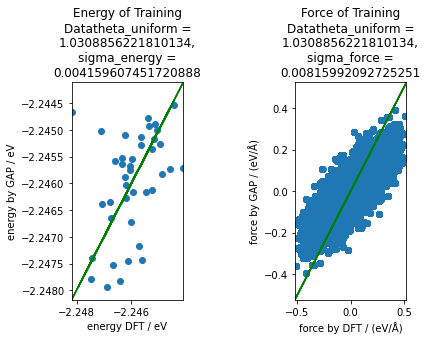

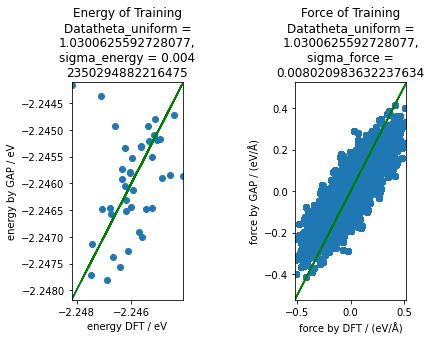

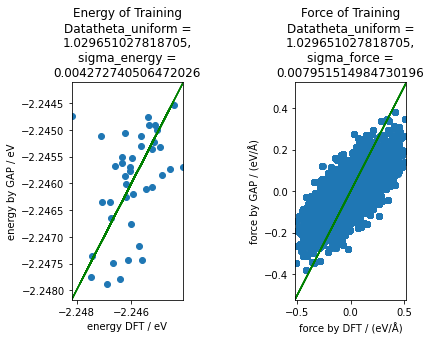

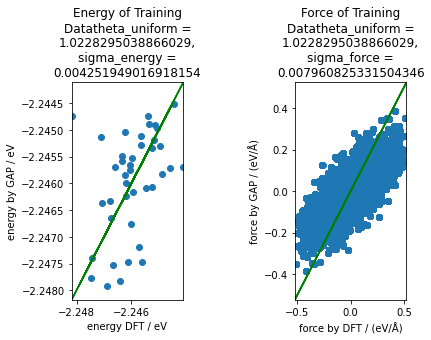

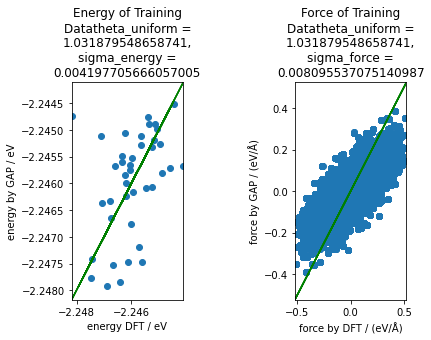

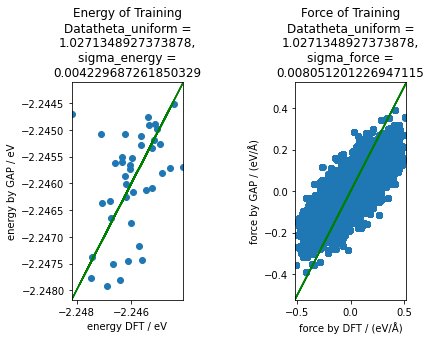

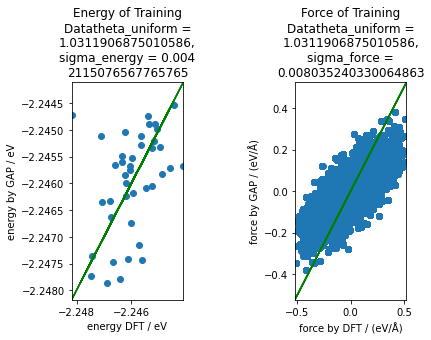

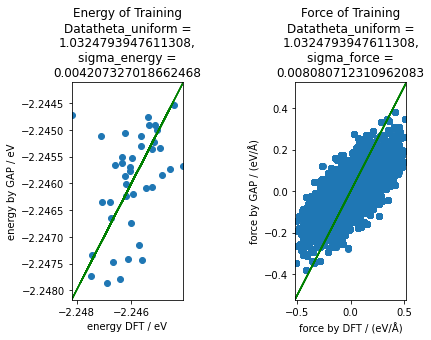

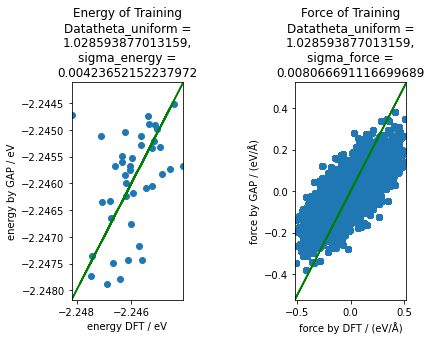

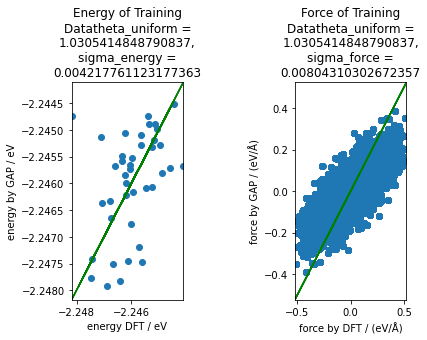

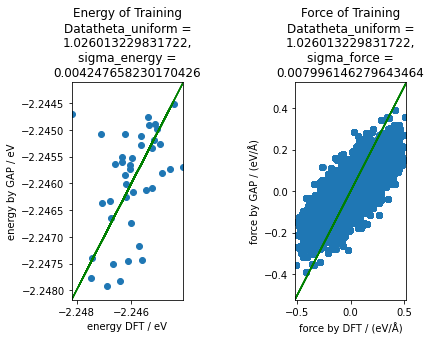

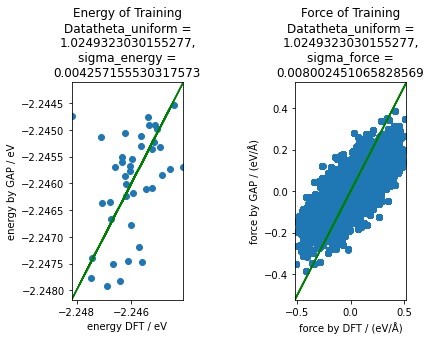

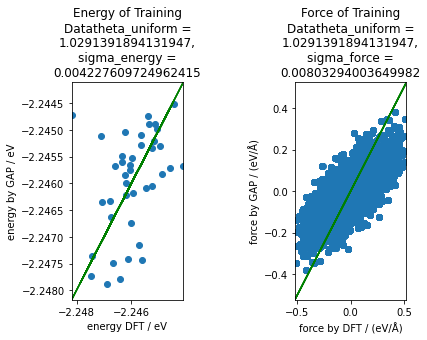

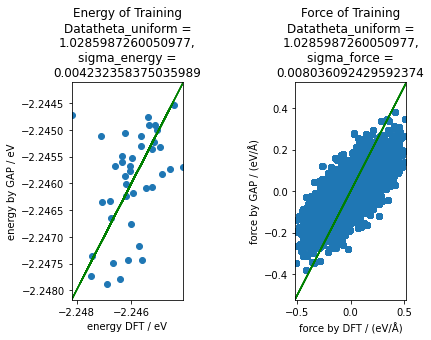

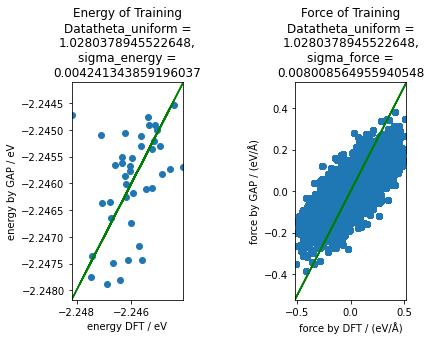

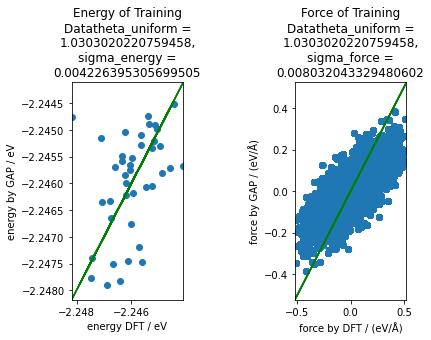

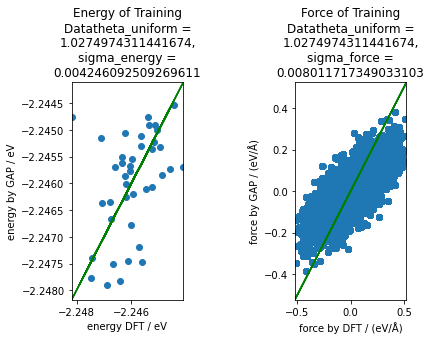

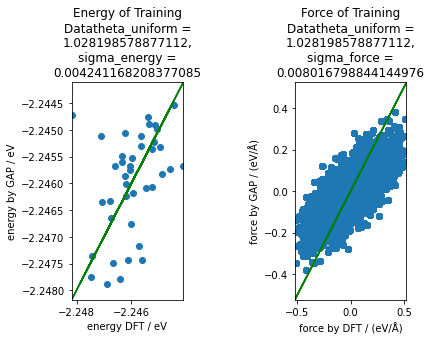

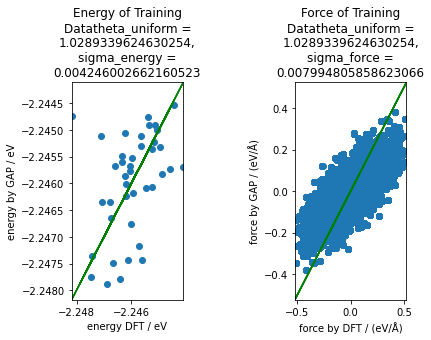

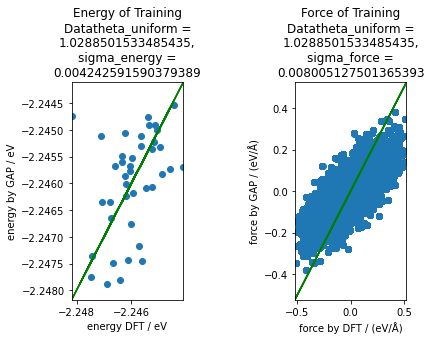

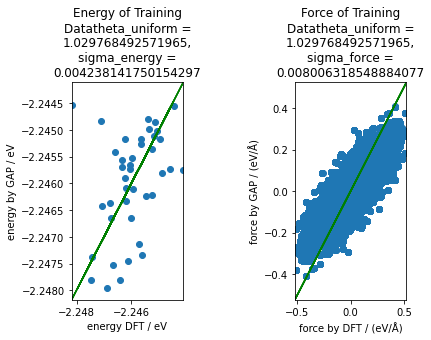

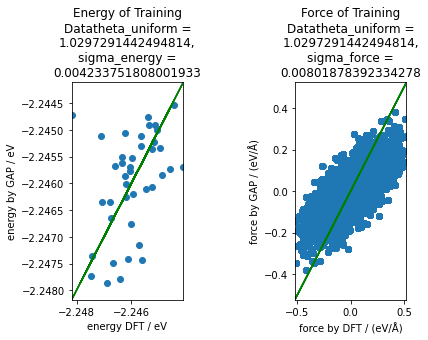

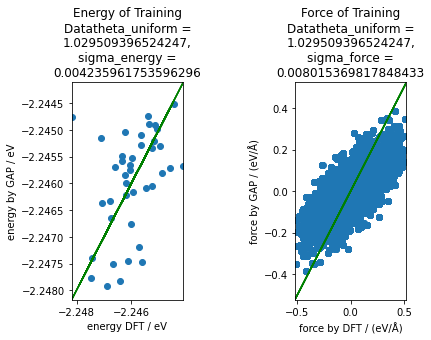

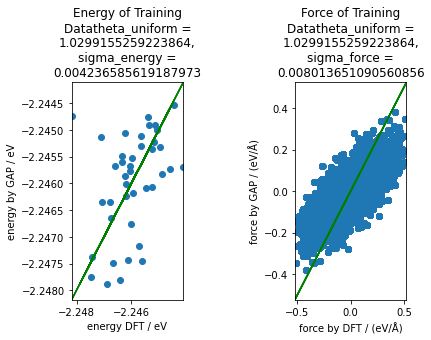

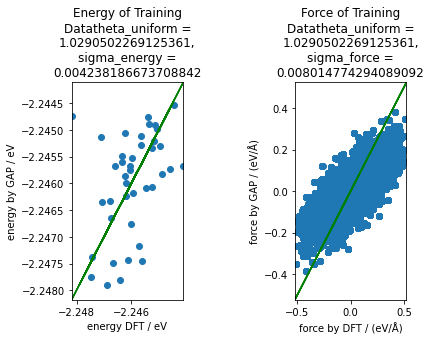

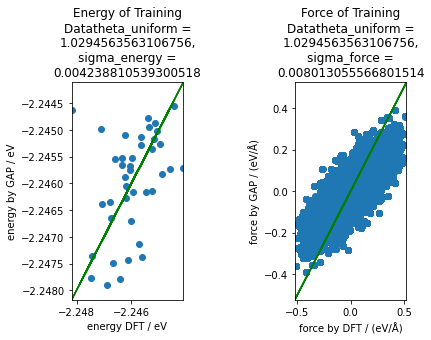

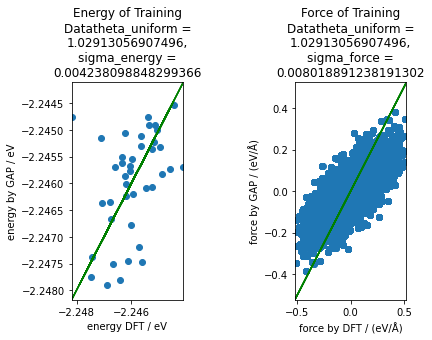

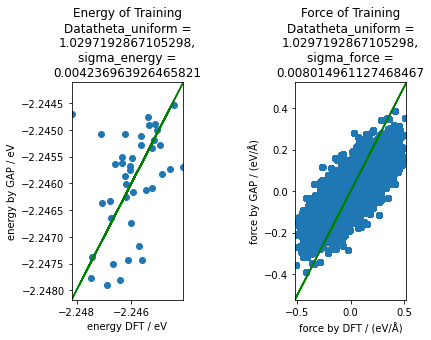

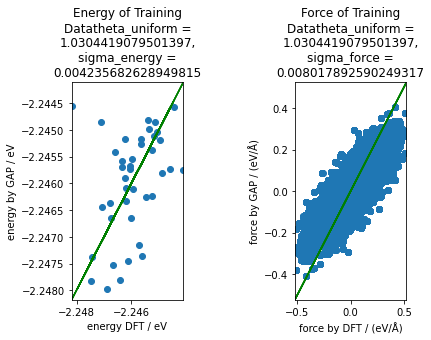

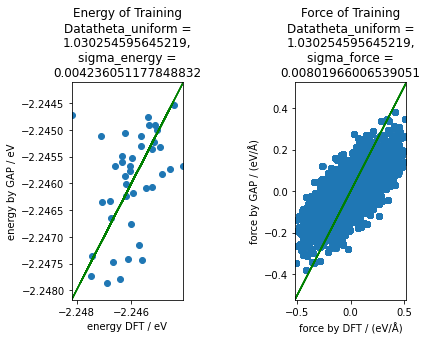

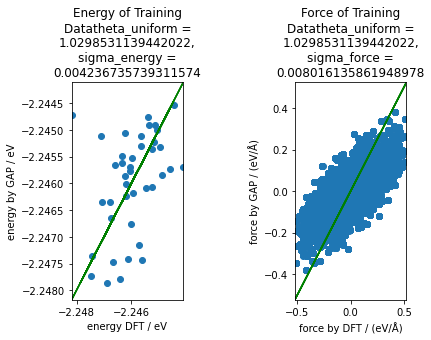

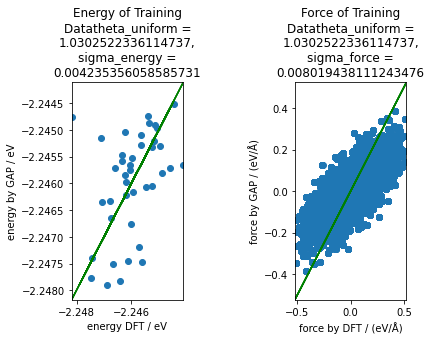

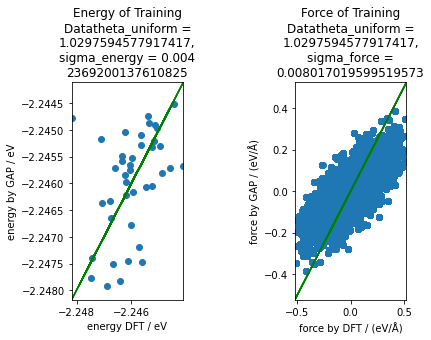

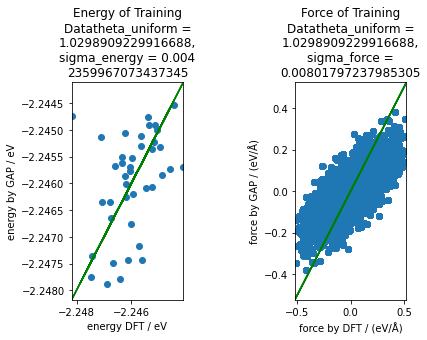

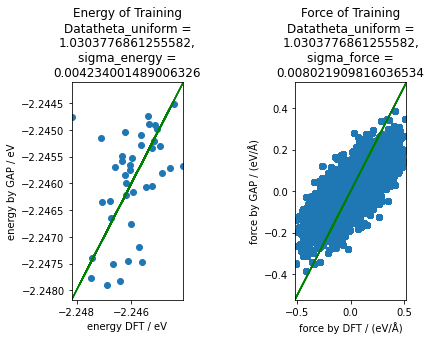

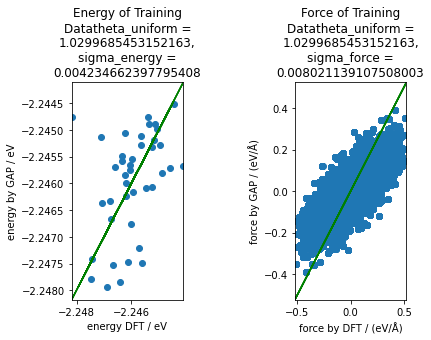

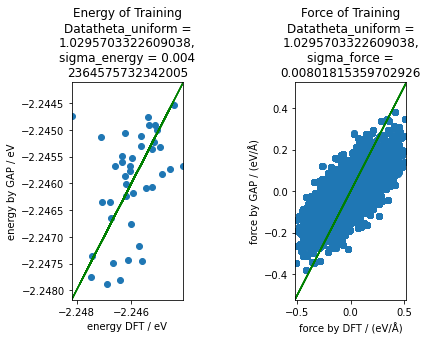

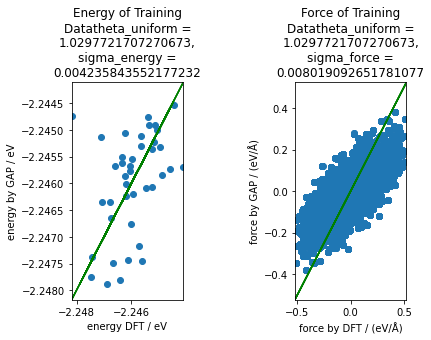

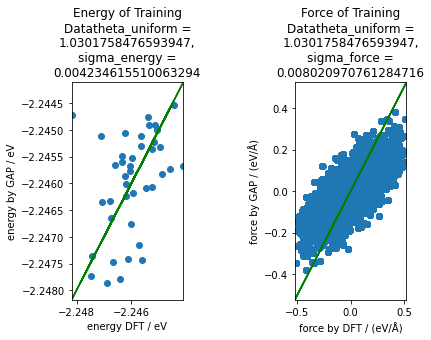

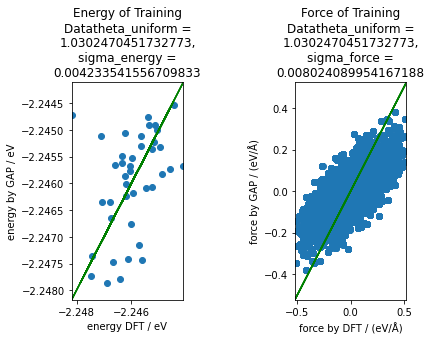

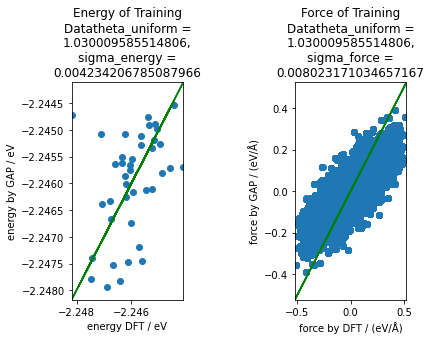

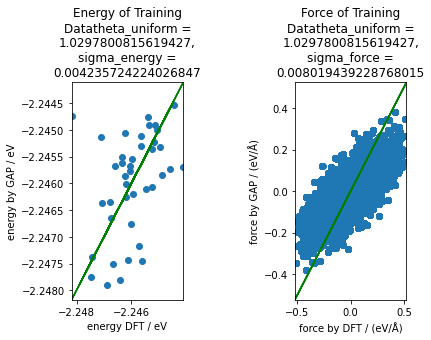

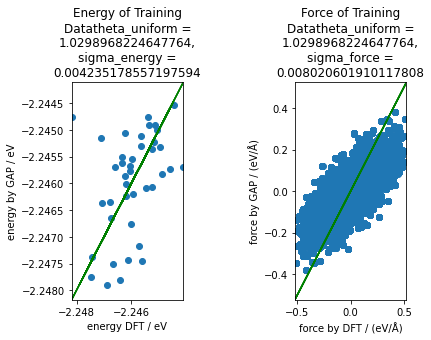

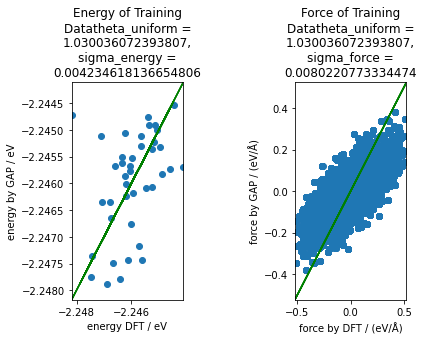

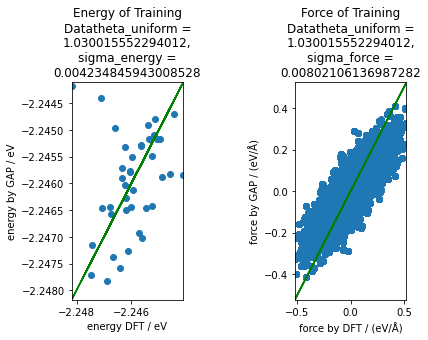

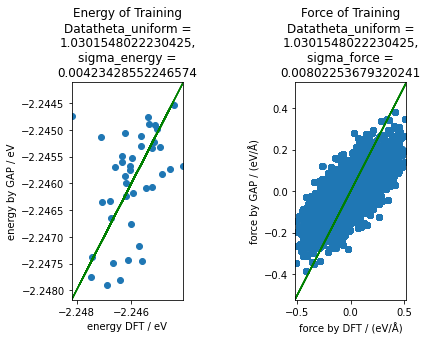

In [7]:
import scipy.optimize
initial_guess = [1,0.004,0.008]
result = scipy.optimize.minimize(RMSE_train,initial_guess,method='Nelder-Mead',
                                 options={'fatol':10e-3,'maxiter':100,'disp':True})


In [8]:
result

 final_simplex: (array([[1.03006256, 0.00423503, 0.00802098],
       [1.03001555, 0.00423485, 0.00802106],
       [1.03003607, 0.00423462, 0.00802208],
       [1.0301548 , 0.00423429, 0.00802254]]), array([0.00031216, 0.00031542, 0.00038354, 0.00038405]))
           fun: 0.0003121608828225849
       message: 'Optimization terminated successfully.'
          nfev: 72
           nit: 32
        status: 0
       success: True
             x: array([1.03006256, 0.00423503, 0.00802098])

## Use Steepest decent method to optimize the RMSE function for training data + validation data

In [9]:
data_file = 'train.xyz'
validation_file = 'test.xyz'
def RMSE_train_val(tef):
    theta,sigma_energy,sigma_force = tef[0],tef[1],tef[2]
    data_file = 'train.xyz'
    validation_file = 'test.xyz'
    # Initialize all parameters, fixed and variable
    cutoff = 4
    n_sparse = 20
    delta = 1
    sparse_method = 'UNIFORM'
    covariance_type = 'ARD_SE'
    sigma_fixed = '0.0 0.0' # sigma for hessian and virial stress is not used and hence won't be optimized
    theta = theta
    sigma_energy = sigma_energy
    sigma_force = sigma_force
    sigma = f"{sigma_energy} {sigma_force} {sigma_fixed}"
    descriptor_2b = distance_2b(cutoff=cutoff, covariance_type=covariance_type,delta=delta,theta_uniform=theta,
                                n_sparse=n_sparse, sparse_method=sparse_method,add_species='T')
    
    # Get parameter string
    parameters = descriptor_2b.get_parameter_string()
    
    # Make model
    model = GAPModel()

    # Select filename in which potential should be stored 
    potential=f"GAP.xml"

    # Train model
    model.train(parameters, training_data=data_file,GAP_potential=potential,sigma=sigma,print_output=False)

    # Select filename in which predictions should be stored for prediction data
    prediction_file_tr= f"quip_2btrain.xyz"
    prediction_file_val= f"quip_2bvalidate.xyz"

    # Predict energies on training data
    model.predict(Test_Data=data_file, GAP_potential=potential, QUIP_Prediction=prediction_file_tr,print_output=False)
    
    # Predict energies on validation data
    model.predict(Test_Data=validation_file, GAP_potential=potential, QUIP_Prediction=prediction_file_val,print_output=True)
    
    
    # Calculate RMSE of error, forces are scaled by 576 (number of forces per timestep: 192 atoms, 
    #3 spacial coordiantes) energies are scaled by factor 10^2 because energy scale is that much 
    # smaller then force scale
    rmse_energy_train = model.energy_RMSE(data_file,prediction_file_tr) /192
    rmse_force_train = model.force_RMSE(data_file,prediction_file_tr) / 576
    rmse_energy_validate = model.energy_RMSE(validation_file,prediction_file_val) /192
    rmse_force_validate = model.force_RMSE(validation_file,prediction_file_val) /576
    
    RMSE = rmse_energy_train + rmse_force_train + rmse_energy_validate + rmse_force_validate
    

    # Make Plot 
    plot = QualityPlot()
    # Make subplots object, returning axis object which is going to be passed to QualityPlot
    figs, axs = plt.subplots(nrows=2,ncols=2,gridspec_kw={'wspace':1,'hspace':1})

    # Plot predicted energies of training data against real energies of training data
    plot.energies_on_energies(real_values=data_file, predicted_values=prediction_file_tr, 
                            axis=axs[0,0],
                            title="\n".join(wrap(f"Energy of Training Data "
                            f"theta_uniform = {theta}, sigma_energy = {sigma_energy}",20)))
    
    plot.forces_on_forces(real_values=data_file, predicted_values=prediction_file_tr, 
                        axis=axs[0,1],
                        title="\n".join(wrap(f"Force of Training Data "
                        f"theta_uniform = {theta}, sigma_force = {sigma_force}",20)))
    
    plot.energies_on_energies(real_values=validation_file, predicted_values=prediction_file_val, 
                            axis=axs[1,0],
                            title="\n".join(wrap(f"Energy of Validation Data "
                            f"theta_uniform = {theta}, sigma_energy = {sigma_energy}",20)))
    
    plot.forces_on_forces(real_values=validation_file, predicted_values=prediction_file_val, 
                        axis=axs[1,1],
                        title="\n".join(wrap(f"Force of Validation Data "
                        f"theta_uniform = {theta}, sigma_force = {sigma_force}",20)))
    # Get real and predicted energies
    #real_energies, predicted_energies = model.getEnergies('train.xyz','quip_2b.xyz')
    
    return RMSE

In [17]:
.x

NameError: name 'result' is not defined

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.8 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.8400000000000001 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.8 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.8 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2b

<ipython-input-9-84aa1b385043>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs, axs = plt.subplots(nrows=2,ncols=2,gridspec_kw={'wspace':1,'hspace':1})


 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.29489711934156604 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.38765432098765606 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.5153497942386845 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.33229080932784827 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filena


 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.38019552617318 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.38207301586629727 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.38272038233469796 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.3855811682097999 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename


 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.3842324333085526 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.3844818956681296 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.3844846994677261 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.3841911038048521 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename

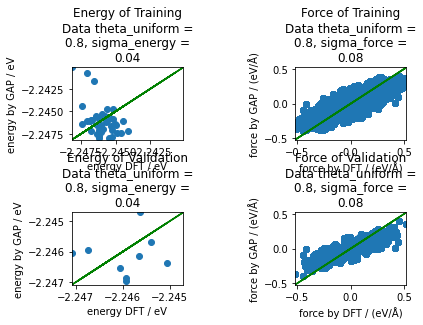

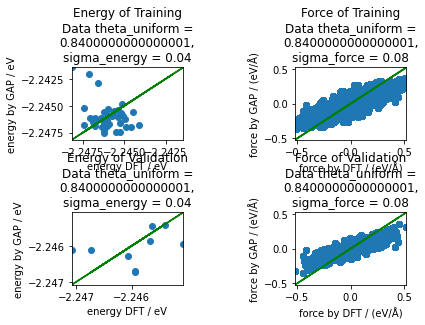

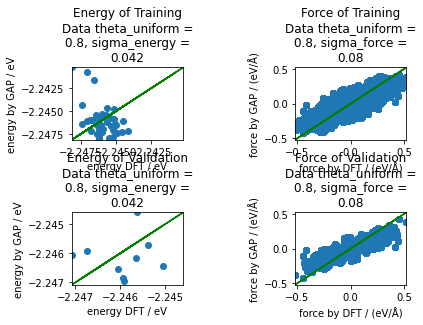

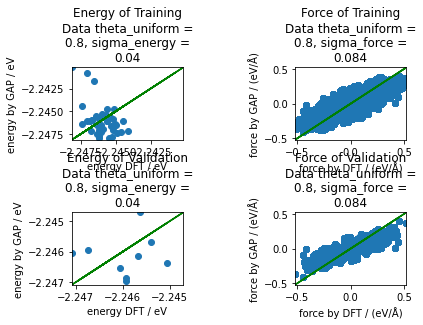

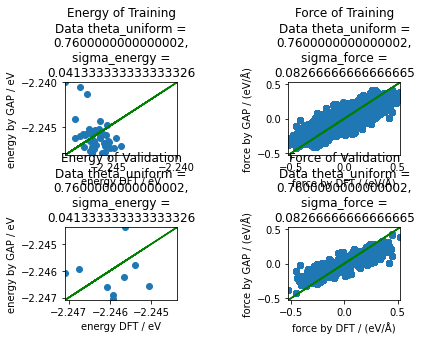

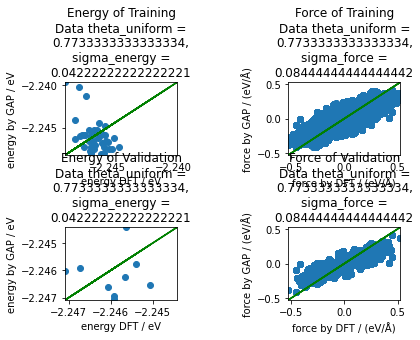

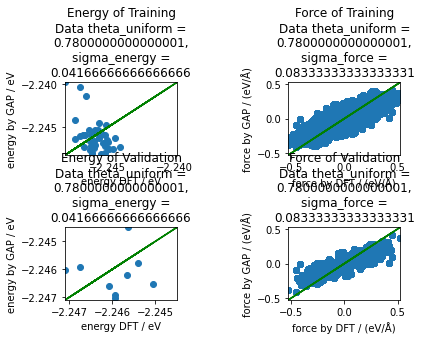

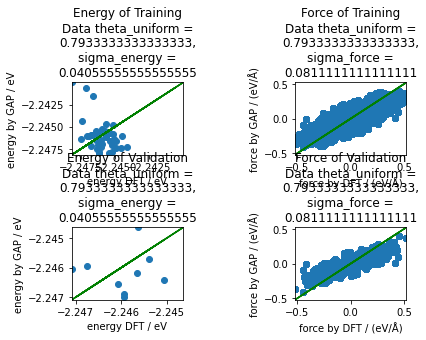

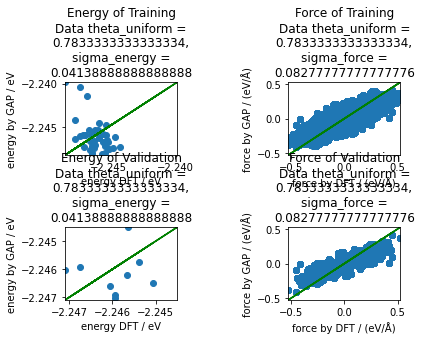

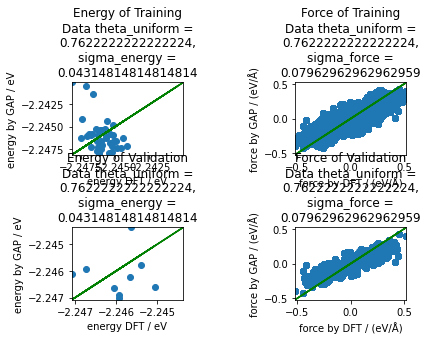

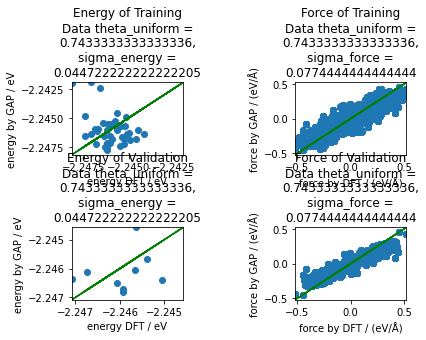

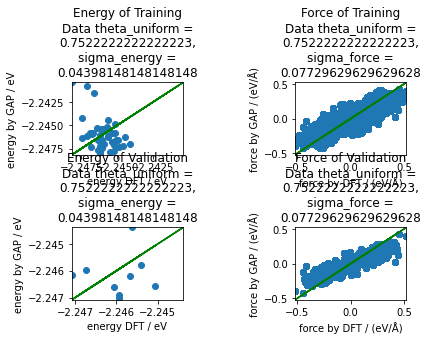

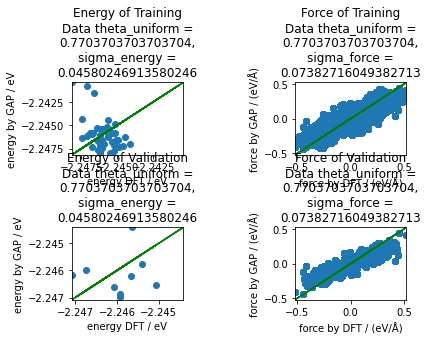

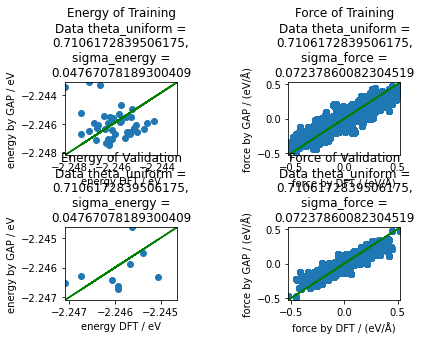

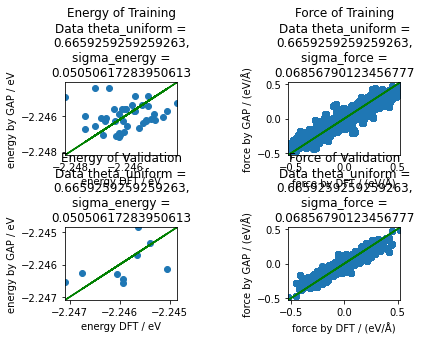

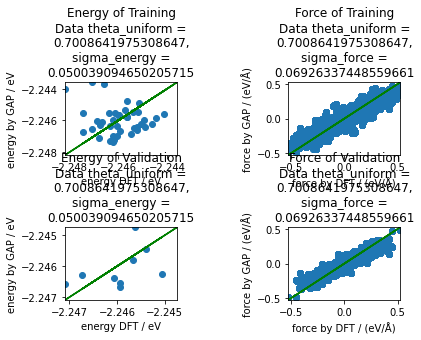

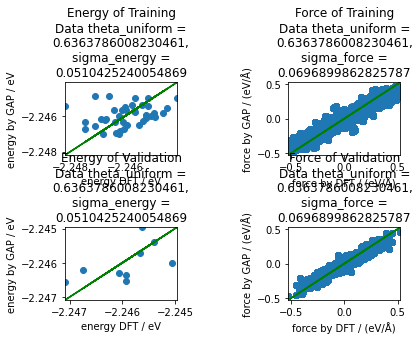

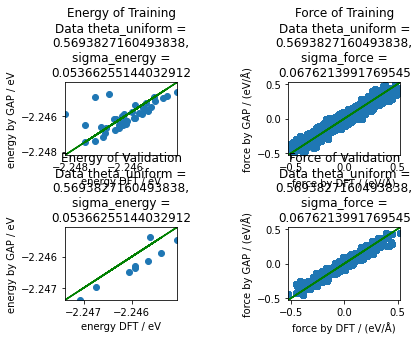

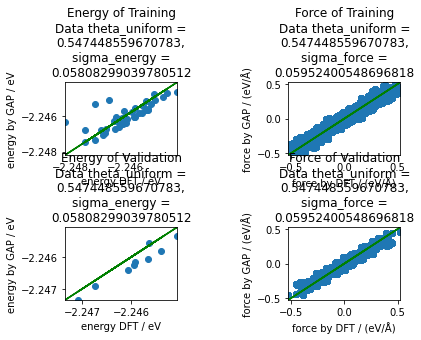

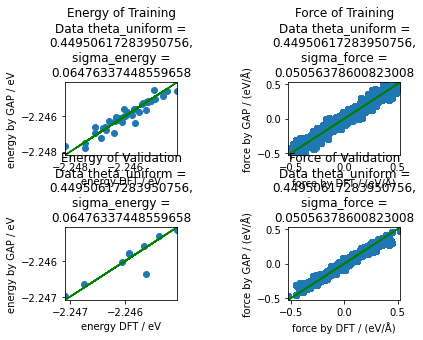

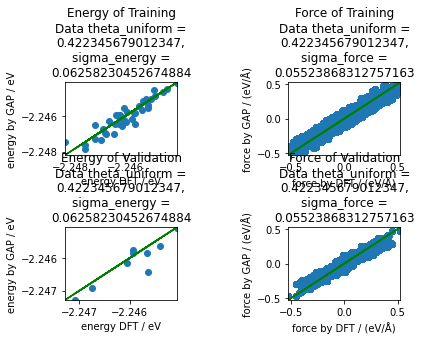

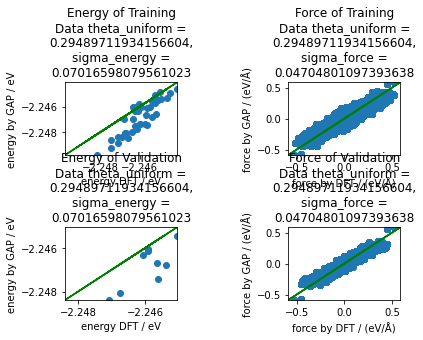

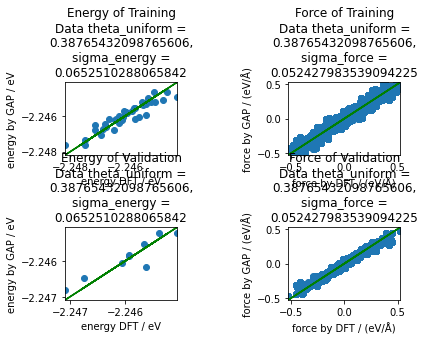

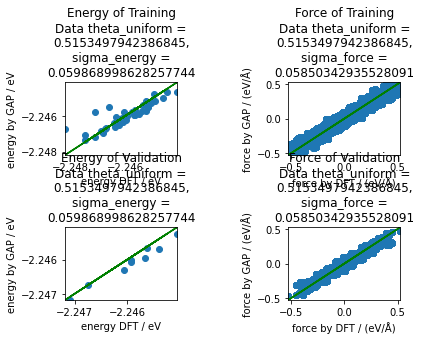

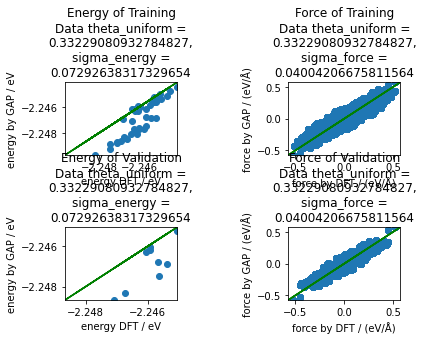

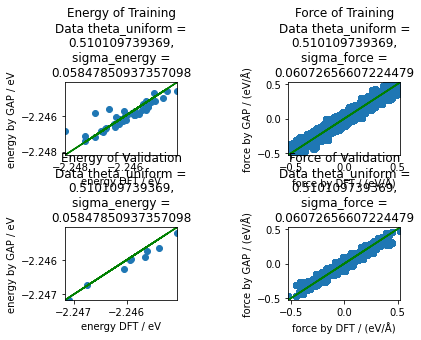

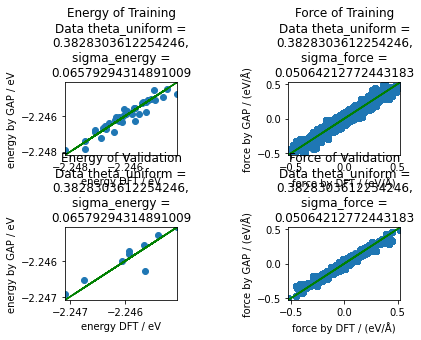

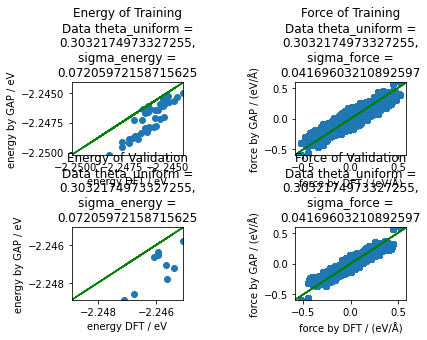

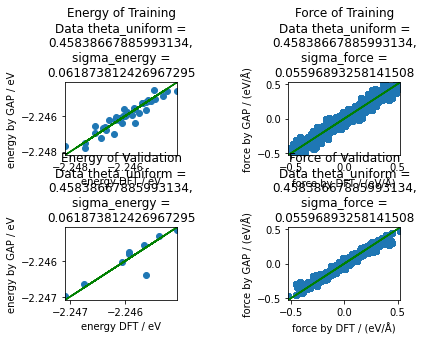

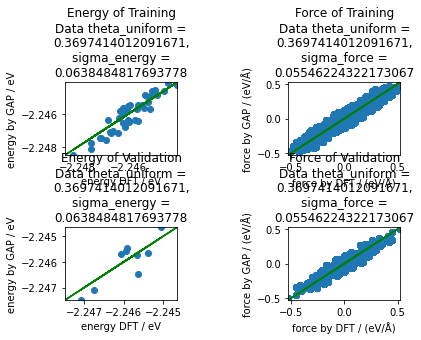

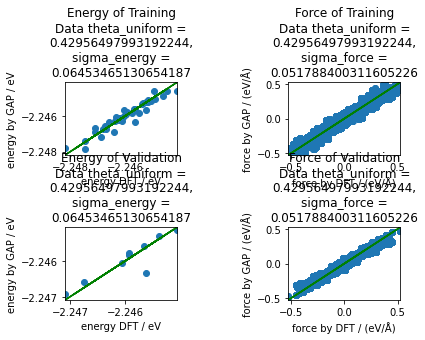

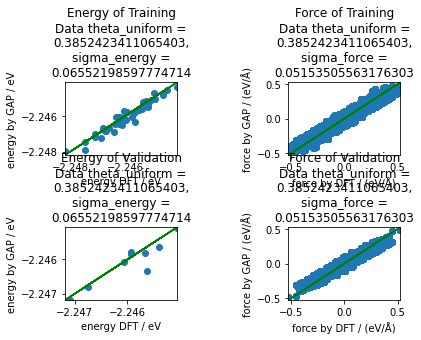

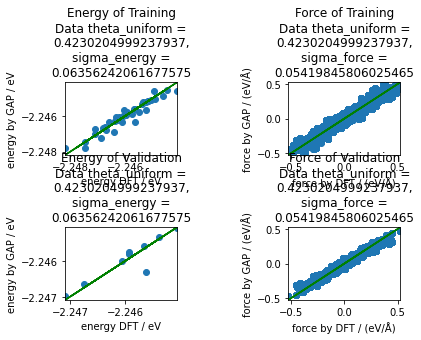

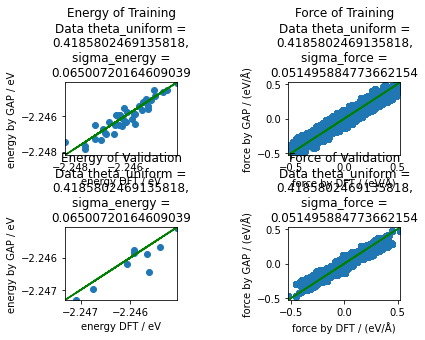

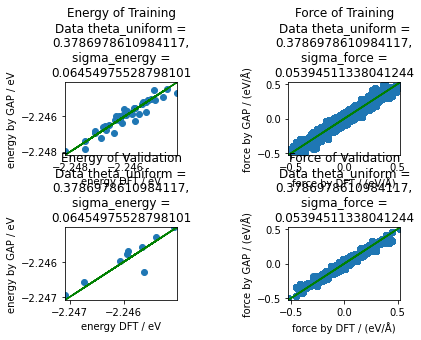

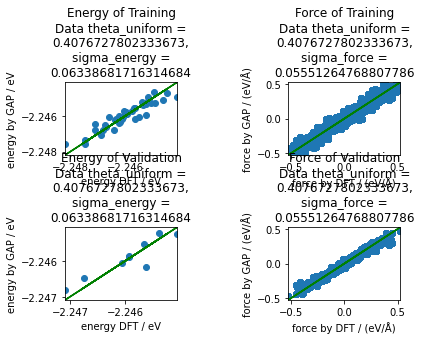

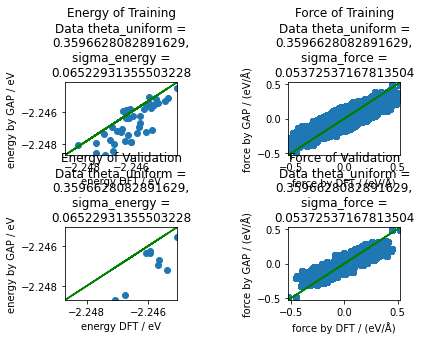

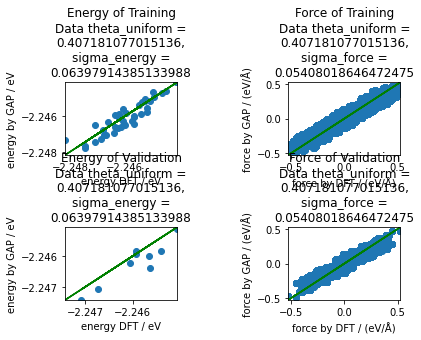

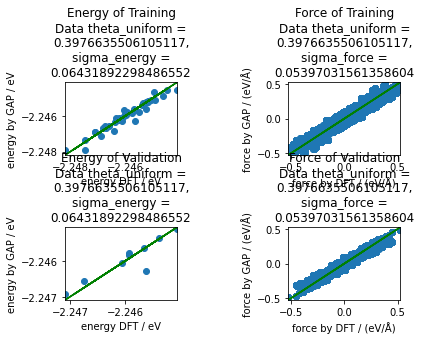

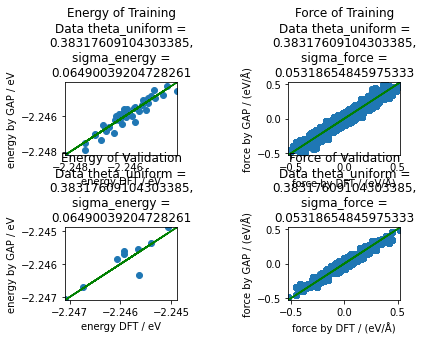

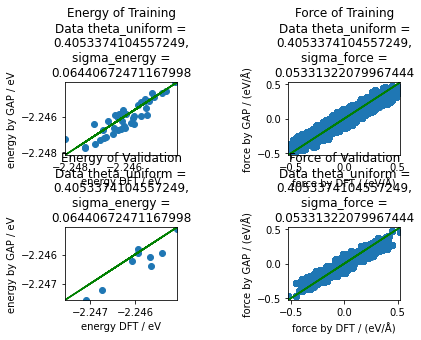

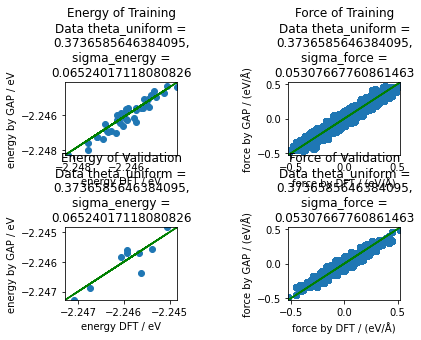

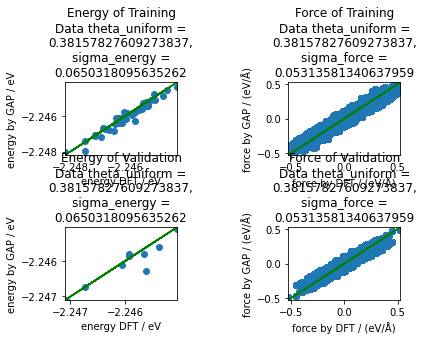

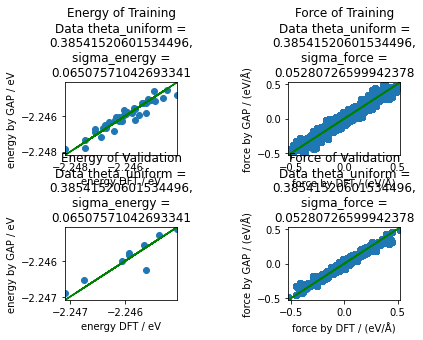

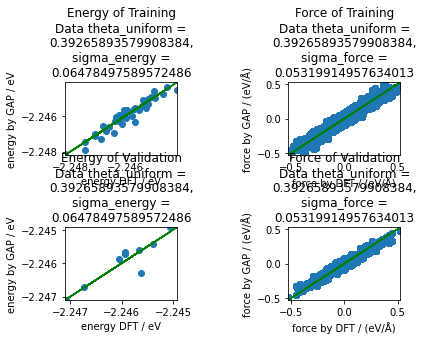

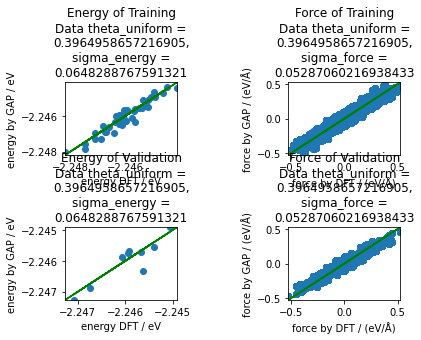

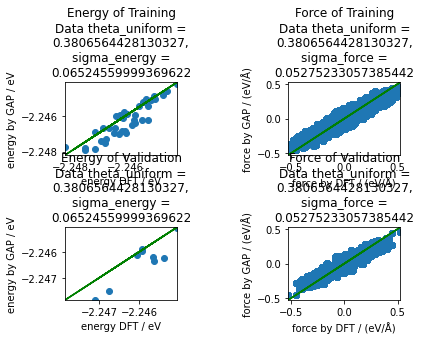

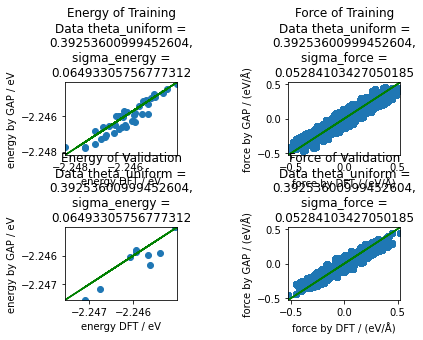

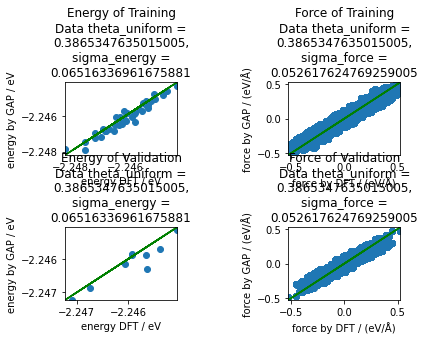

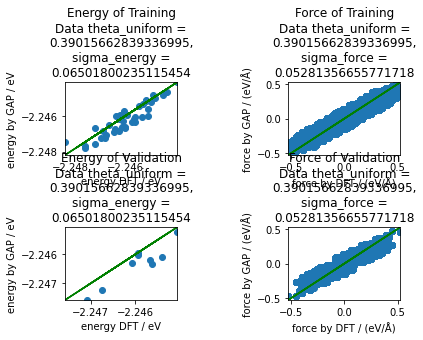

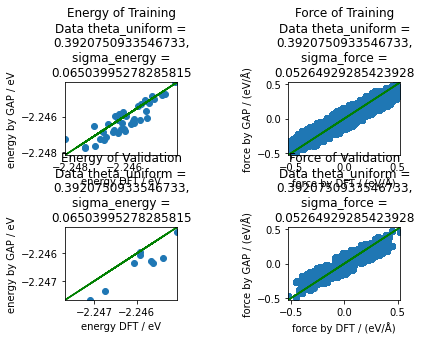

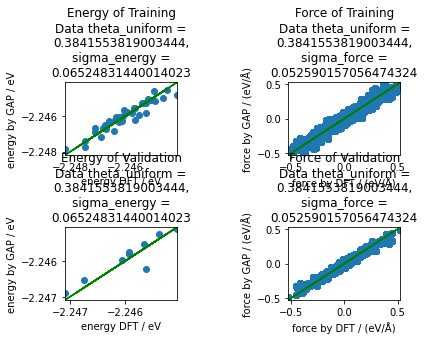

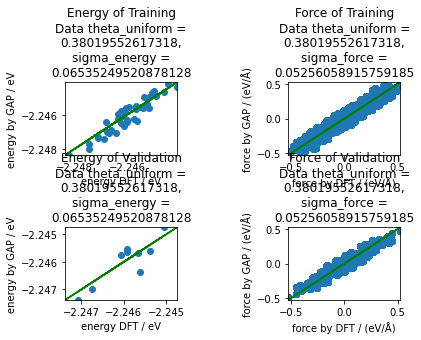

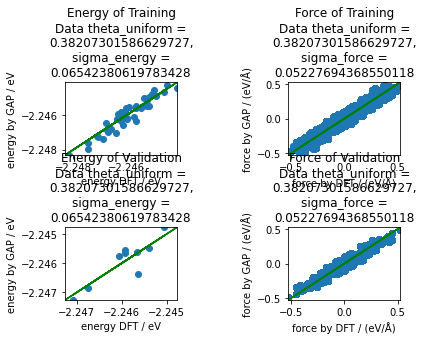

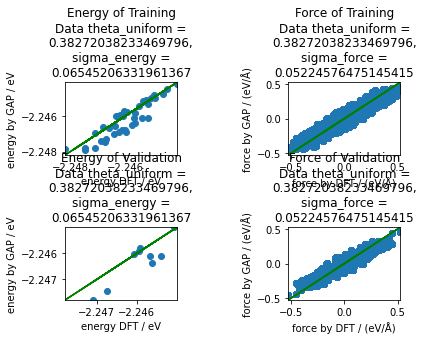

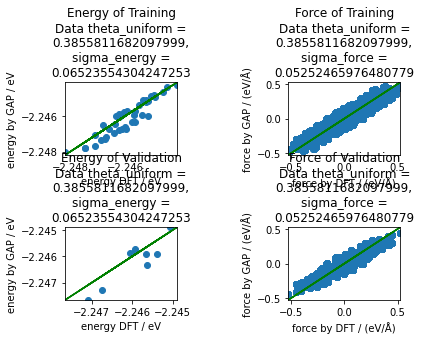

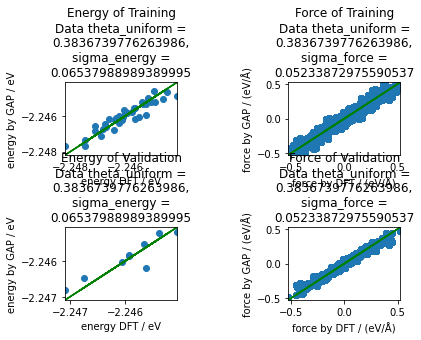

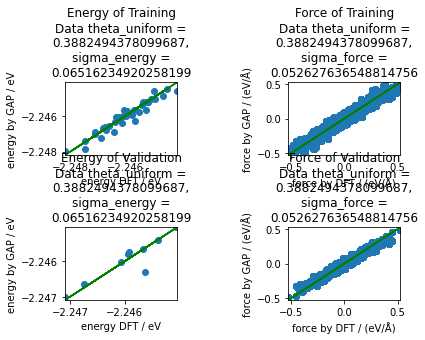

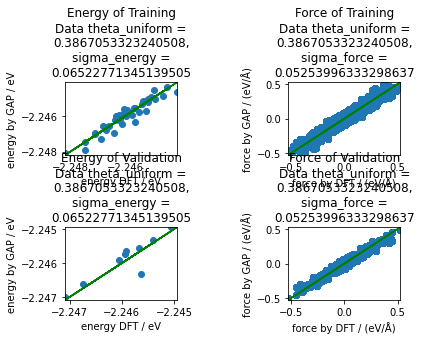

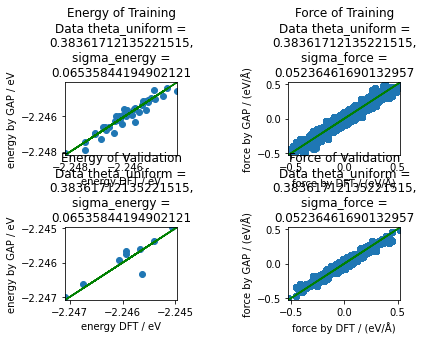

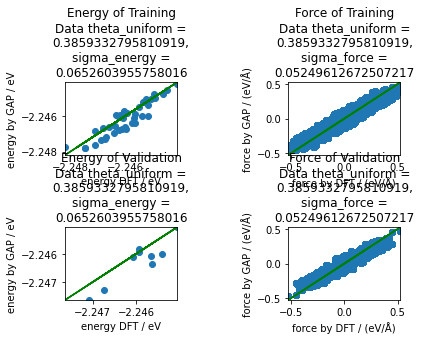

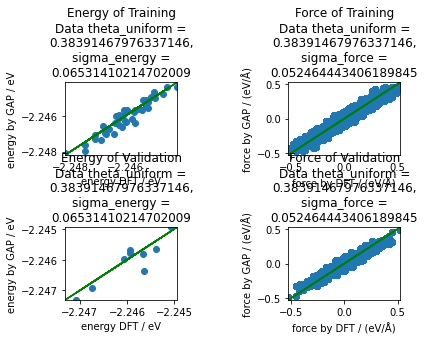

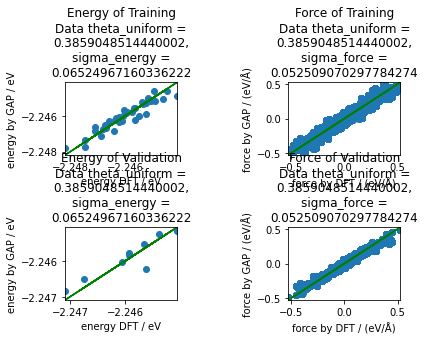

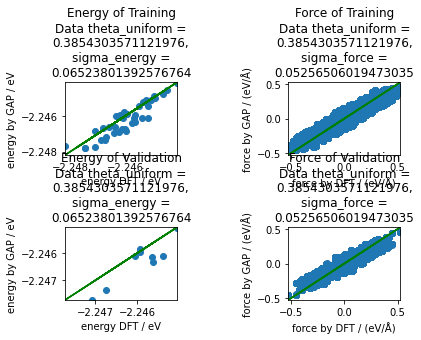

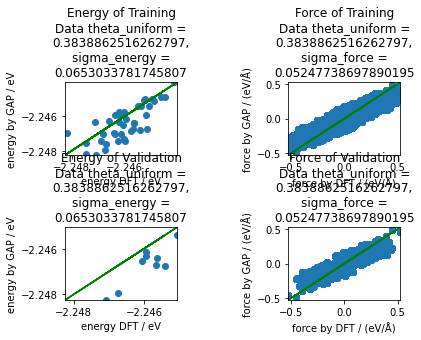

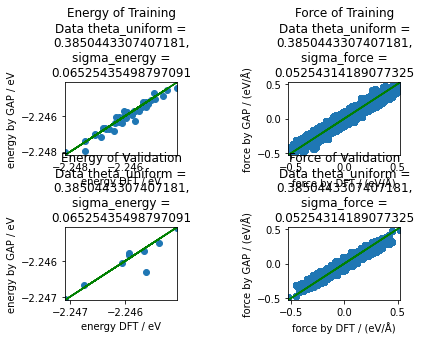

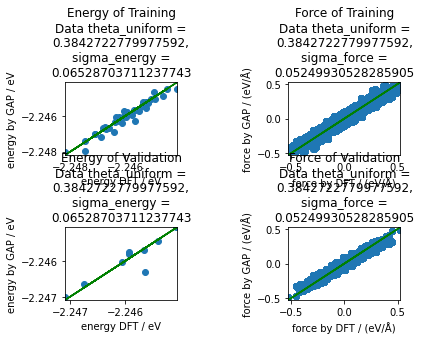

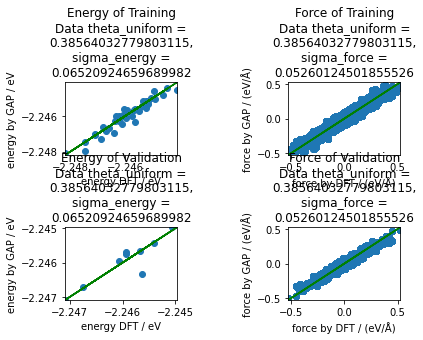

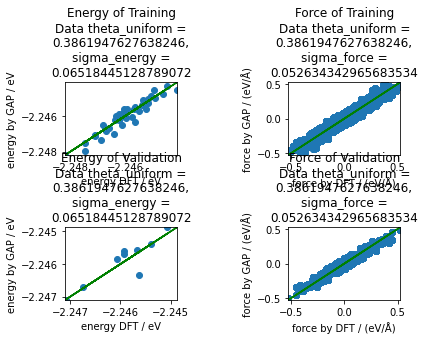

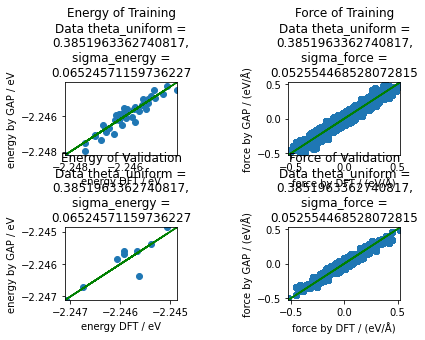

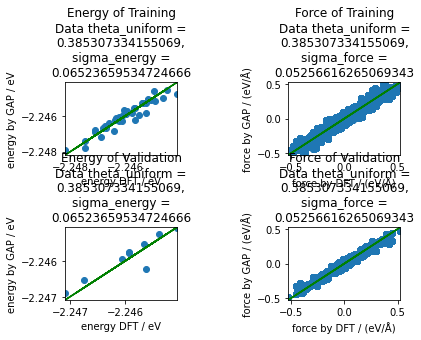

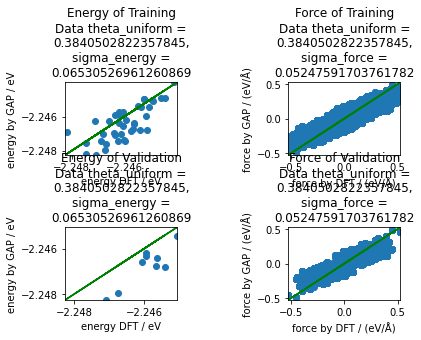

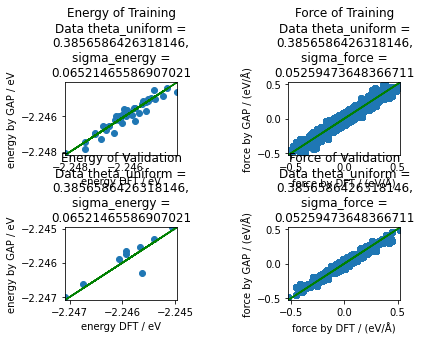

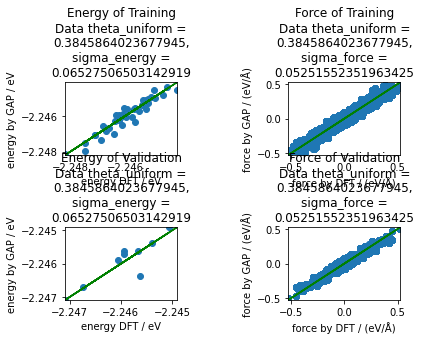

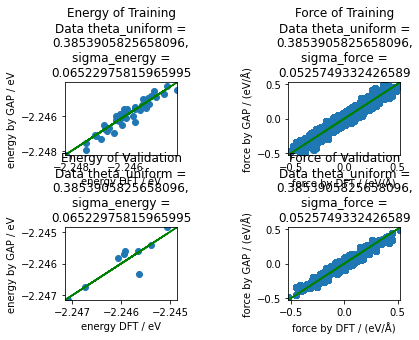

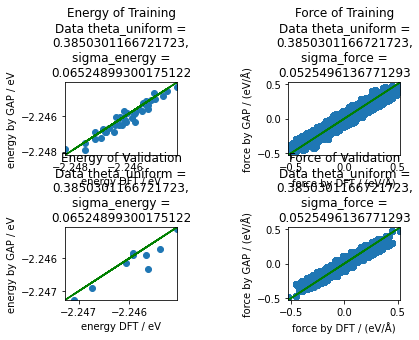

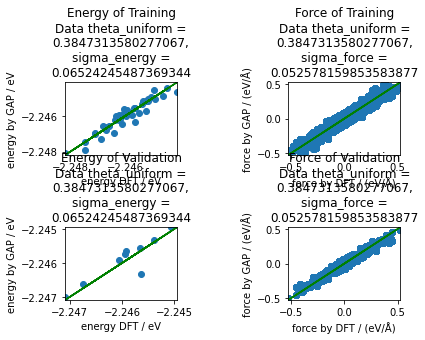

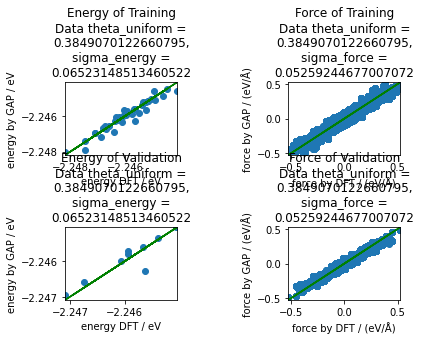

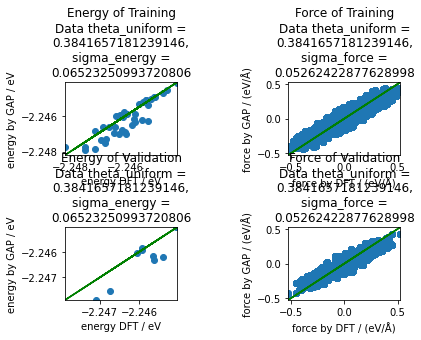

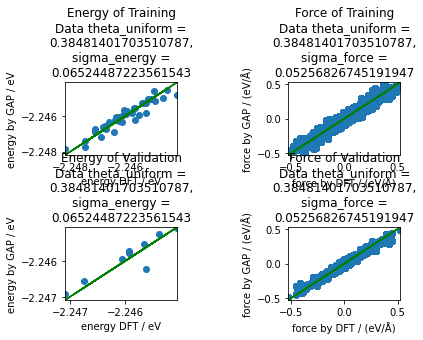

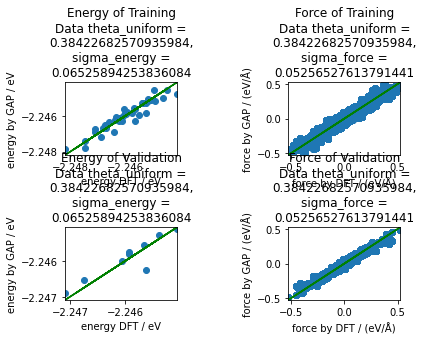

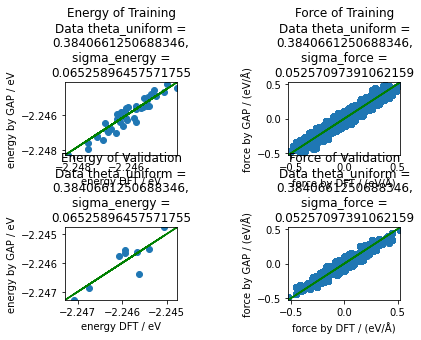

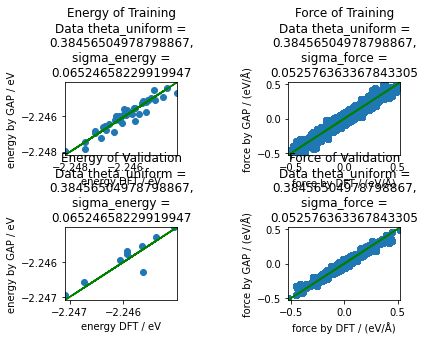

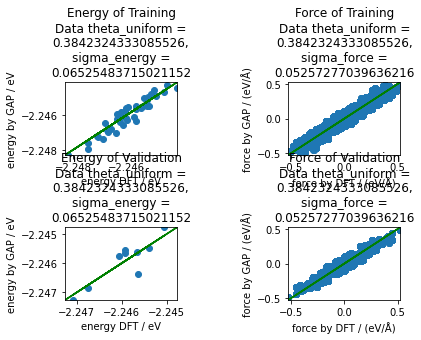

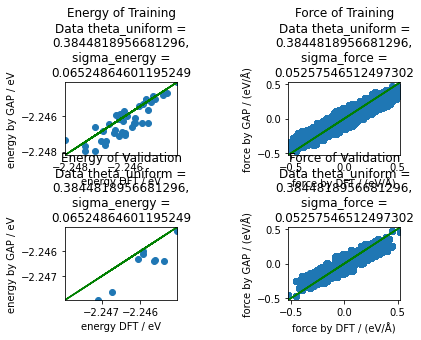

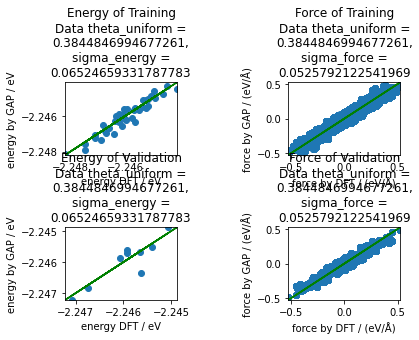

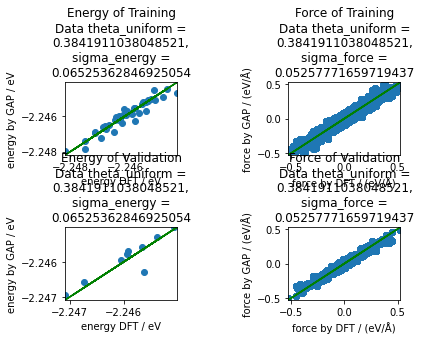

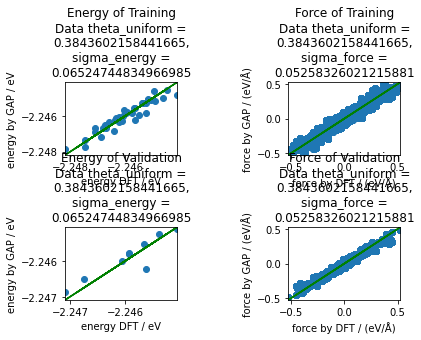

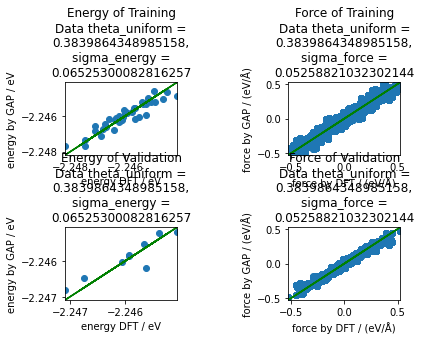

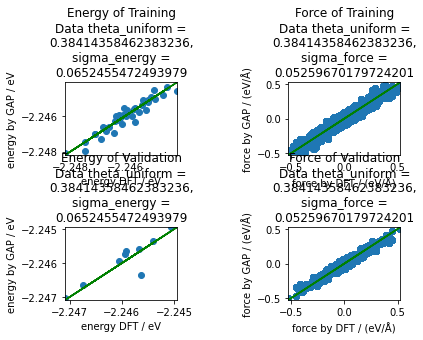

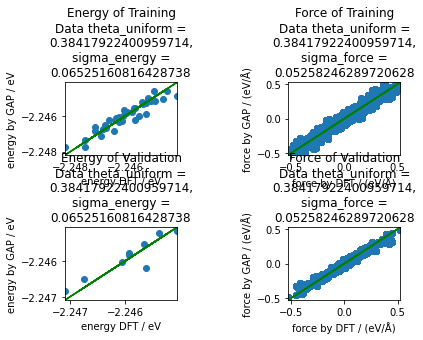

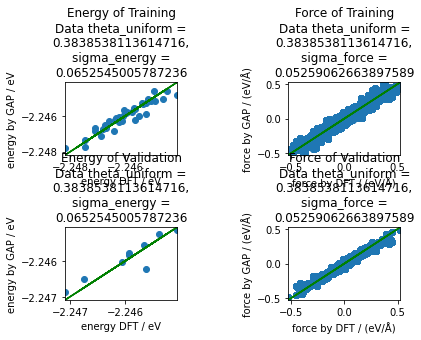

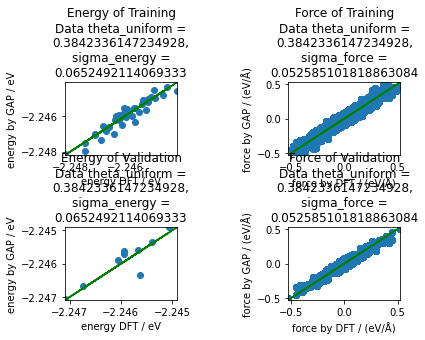

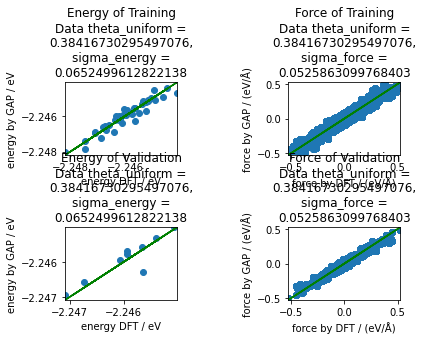

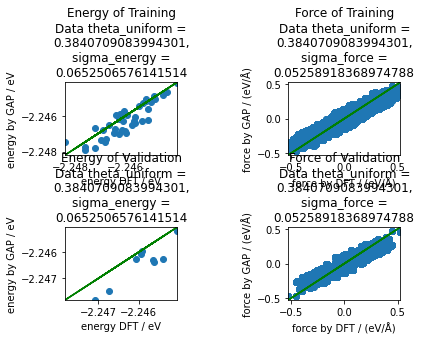

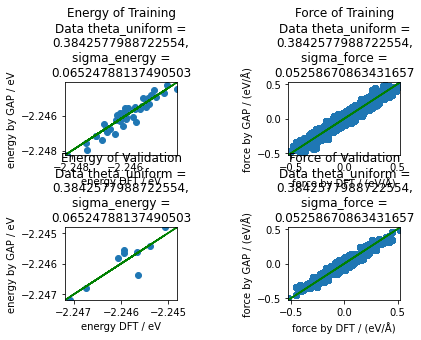

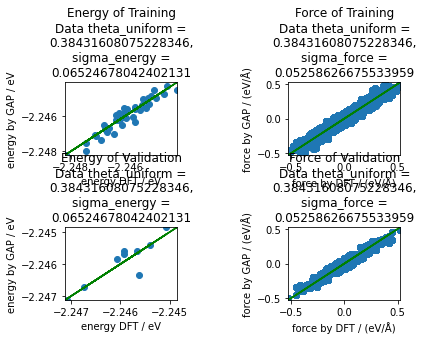

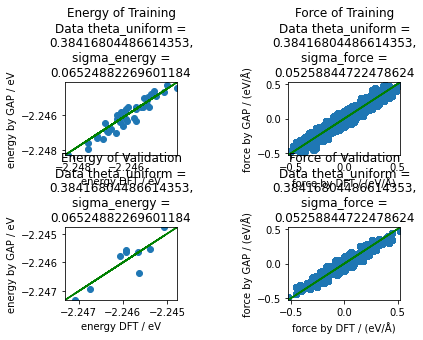

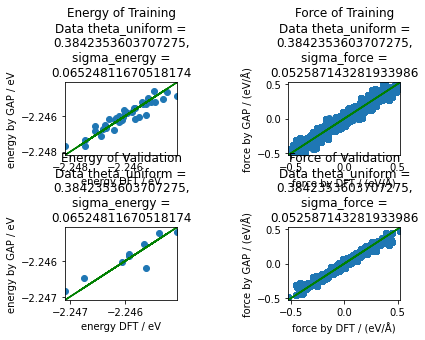

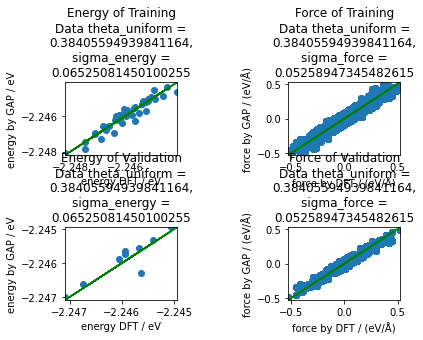

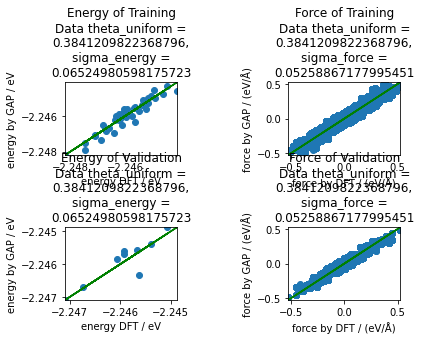

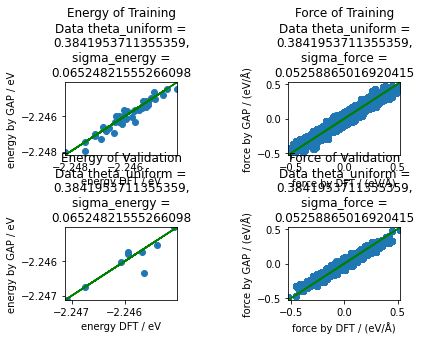

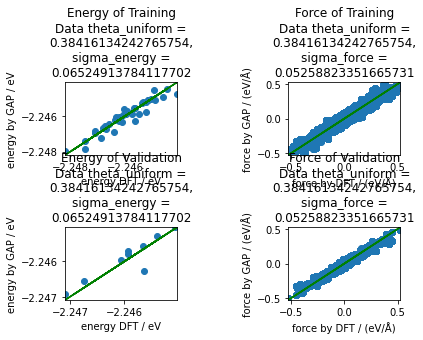

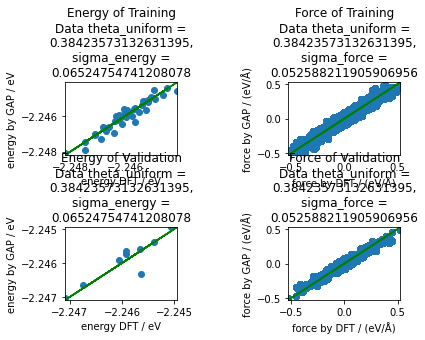

In [10]:
import scipy.optimize
initial_guess = [0.8,0.04,0.08]
result = scipy.optimize.minimize(RMSE_train_val,initial_guess,method='Nelder-Mead',
                                 options={'fatol':10e-3,'maxiter':100,'disp':True})

In [11]:
result

 final_simplex: (array([[0.38415538, 0.06524831, 0.05259016],
       [0.38416134, 0.06524914, 0.05258823],
       [0.38423573, 0.06524755, 0.05258821],
       [0.38419537, 0.06524822, 0.05258865]]), array([0.00020581, 0.0002124 , 0.00022947, 0.00027314]))
           fun: 0.0002058062558709927
       message: 'Optimization terminated successfully.'
          nfev: 104
           nit: 46
        status: 0
       success: True
             x: array([0.38415538, 0.06524831, 0.05259016])

## Test to figure out nice figure seetings

In [23]:
data_file = 'train.xyz'
def RMSE_plot(theta,sigma_energy,sigma_force):
    data_file = 'train.xyz'
    validation_file = 'test.xyz'
    # Initialize all parameters, fixed and variable
    cutoff = 4
    n_sparse = 20
    delta = 1
    sparse_method = 'UNIFORM'
    covariance_type = 'ARD_SE'
    sigma_fixed = '0.0 0.0' # sigma for hessian and virial stress is not used and hence won't be optimized
    theta = theta
    sigma_energy = sigma_energy
    sigma_force = sigma_force
    sigma = f"{sigma_energy} {sigma_force} {sigma_fixed}"
    descriptor_2b = distance_2b(cutoff=cutoff, covariance_type=covariance_type,delta=delta,theta_uniform=theta,
                                n_sparse=n_sparse, sparse_method=sparse_method,add_species='T')
    
    # Get parameter string
    parameters = descriptor_2b.get_parameter_string()
    
    # Make model
    model = GAPModel()

    # Select filename in which potential should be stored 
    potential=f"GAP.xml"

     # Train model
    model.train(parameters, training_data=data_file,GAP_potential=potential,sigma=sigma,print_output=False)

    # Select filename in which predictions should be stored for prediction data
    prediction_file_tr= f"quip_2btrain.xyz"
    prediction_file_val= f"quip_2bvalidate.xyz"

    # Predict energies on training data
    model.predict(Test_Data=data_file, GAP_potential=potential, QUIP_Prediction=prediction_file_tr,print_output=False)
    
    # Predict energies on validation data
    model.predict(Test_Data=validation_file, GAP_potential=potential, QUIP_Prediction=prediction_file_val,print_output=True)
    
    # Calculate RMSE of error, forces are scaled by 576 (number of forces per timestep: 192 atoms, 
    #3 spacial coordiantes) energies are scaled by factor 10^2 because energy scale is that much 
    # smaller then force scale
    rmse_energy_train = model.energy_RMSE(data_file,prediction_file_tr) /192
    rmse_force_train = model.force_RMSE(data_file,prediction_file_tr) / 576
    rmse_energy_validate = model.energy_RMSE(validation_file,prediction_file_val) /192
    rmse_force_validate = model.force_RMSE(validation_file,prediction_file_val) /576
    
    RMSE = rmse_energy_train + rmse_force_train + rmse_energy_validate + rmse_force_validate

    # Make Plot 
    plot = QualityPlot()
    # Make subplots object, returning axis object which is going to be passed to QualityPlot
    figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})
    
    # Plot predicted energies of training data against real energies of training data
    plot.energies_on_energies(real_values=data_file, predicted_values=prediction_file_tr, 
                            axis=axs[0],
                            title="\n".join(wrap(f"Energy of Training Data "
                            f"theta_uniform = {theta}, sigma_energy = {sigma_energy}, sigma_force = {sigma_force}",20)))
    
    #plot.forces_on_forces(real_values=data_file, predicted_values=prediction_file_tr, 
                        #axis=axs[0,1],
                        #title="\n".join(wrap(f"Force of Training Data "
                        #f"theta_uniform = {theta}, sigma_force = {sigma_force}",20)))
    
    plot.energies_on_energies(real_values=validation_file, predicted_values=prediction_file_val, 
                            axis=axs[1],
                            title="\n".join(wrap(f"Energy of Validation Data "
                            f"theta_uniform = {theta}, sigma_energy = {sigma_energy}, sigma_force = {sigma_force}",20)))
    
    #plot.forces_on_forces(real_values=validation_file, predicted_values=prediction_file_val, 
                        #axis=axs[1,1],
                        #title="\n".join(wrap(f"Force of Validation Data "
                        #f"theta_uniform = {theta}, sigma_force = {sigma_force}",20)))
    
    return RMSE

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 



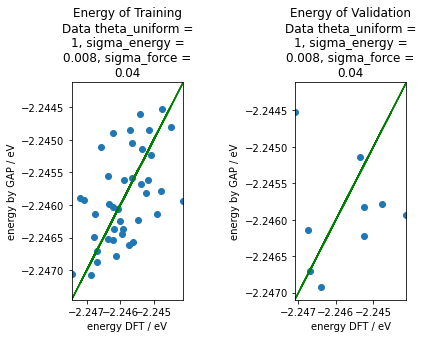

In [24]:
initial_guess = [1,0.008,0.04] 
RMSE_init = RMSE_plot(initial_guess[0],initial_guess[1],initial_guess[2])

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.38415538 sparse_method = UNIFORM add_species = T n_sparse = 20
 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 



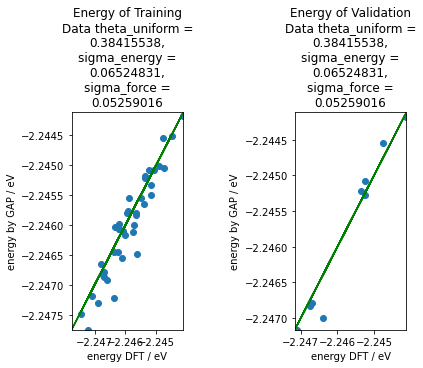

In [25]:
optimized_guess = [0.38415538, 0.06524831, 0.05259016]
RMSE_opt = RMSE_plot(optimized_guess[0],optimized_guess[1],optimized_guess[2])